<a href="https://colab.research.google.com/github/ZahraBarati99/Feature-Selection-SVD-vs.-Classical/blob/main/CMD5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import time

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


#(SECOM) بخش اول: آماده‌سازی داده‌های صنعتی

## مرحله ۱.۱- بارگذاری دیتاست

In [2]:
from google.colab import files
uploaded = files.upload()

Saving secom.csv to secom (1).csv


In [3]:
# Load SECOM dataset
df = pd.read_csv("secom.csv")

# Separate features and target label (last column is Pass/Fail)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("X shape:", X.shape)
print("y shape:", y.shape)

X.head()

X shape: (1567, 590)
y shape: (1567,)


,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [4]:
# Remove constant (zero-variance) features
variance = X.var(skipna=True)
X = X.loc[:, variance > 0]
print("Shape after removing constant columns:", X.shape)

# Impute missing values using median
X = X.fillna(X.median())

# Store feature (sensor) names
features = X.columns.to_numpy()

Shape after removing constant columns: (1567, 474)


## مرحله ۲.۱- نرمال‌سازی داده‌ها

In [5]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# بخش دوم: روش های کلاسیک

In [6]:
print("Class distribution:\n", y.value_counts())


Class distribution:
 Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


## مرحله ۱.۲-  روش فیلتر

In [7]:
# Mutual Information

start_time = time.time()
mi = mutual_info_classif(X_scaled, y, random_state=42)
mi_time = time.time() - start_time

print("\nMI shape:\n", mi.shape)
print(f"\nMI execution time: {mi_time:.4f} seconds")

topk = 20
mi_indices = np.argsort(mi)[-topk:][::-1]
mi_feature_names = X.columns.to_numpy()[mi_indices]

X_mi = X_scaled[:, mi_indices]

print("\nTop-20 MI feature indices:\n", mi_indices)
print("\nTop-20 MI feature names:\n", mi_feature_names)
print("\nTop-20 MI scores:\n", mi[mi_indices])


MI shape:
 (474,)

MI execution time: 4.5400 seconds

Top-20 MI feature indices:
 [457 425 387 461  39  38 454 455 120 121 328  31 459 363 232  60 115 329
 333 260]

Top-20 MI feature names:
 ['573' '541' '477' '577' '41' '40' '570' '571' '127' '128' '406' '33'
 '575' '443' '275' '65' '122' '407' '411' '305']

Top-20 MI scores:
 [0.02807592 0.0267149  0.02654343 0.02601716 0.02530736 0.02392883
 0.02268884 0.02244297 0.02203962 0.02194876 0.02168077 0.0214539
 0.02122604 0.02107233 0.02082867 0.02077422 0.0206713  0.02030544
 0.02006977 0.0200144 ]


## مرحله ۲.۲-  روش پوششی  

In [8]:
# RFE

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rfe = RFE(estimator=rf, n_features_to_select=20, step=0.1)

start_time = time.time()
rfe.fit(X_scaled, y)
rfe_time = time.time() - start_time

rfe_indices = np.where(rfe.support_)[0]
rfe_feature_names = X.columns.to_numpy()[rfe_indices]
X_rfe = X_scaled[:, rfe_indices]

print("\nTop-20 RFE feature indices:\n", rfe_indices)
print("\nTop-20 RFE feature names:\n", rfe_feature_names)
print(f"\nRFE execution time: {rfe_time:.4f} seconds")



Top-20 RFE feature indices:
 [  2  14  36  38  47  54  59  60  65  71  96 144 194 224 256 278 286 346
 361 387]

Top-20 RFE feature names:
 ['2' '16' '38' '40' '51' '59' '64' '65' '71' '77' '103' '153' '212' '267'
 '301' '333' '341' '426' '441' '477']

RFE execution time: 32.6307 seconds


# بخش سوم: روش جبری

## مرحله ۱.۳-  تجزیه

In [9]:
k = 20      # number of leading singular components used in scoring
topk = 20   # number of selected features

# SVD decomposition
start_time = time.time()
U, s, Vt = np.linalg.svd(X_scaled, full_matrices=False)
svd_time = time.time() - start_time

print("U shape:", U.shape)
print("s shape:", s.shape)
print("Vt shape:", Vt.shape)
print(f"\nSVD time: {svd_time:.4f} seconds")

U shape: (1567, 474)
s shape: (474,)
Vt shape: (474, 474)

SVD time: 0.2175 seconds


## مرحله ۲.۳-  تحلیل ریاضی (امتیازدهی)

In [10]:
# Score Function
start_time = time.time()
sigma2 = s[:k] ** 2
absV = np.abs(Vt[:k, :])
scores = (sigma2[:, None] * absV).sum(axis=0)
svd_select_time = time.time() - start_time

print("scores shape:", scores.shape)
print(f"\nSVD selection time: {svd_select_time:.4f} seconds")

scores shape: (474,)

SVD selection time: 0.0005 seconds


## مرحله ۳.۳-  انتخاب   

In [11]:
# Select top features based on scores
svd_indices = np.argsort(scores)[-topk:][::-1]
svd_feature_names = features[svd_indices]
svd_scores = scores[svd_indices]

X_svd = X_scaled[:, svd_indices]

print("\nTop-20 SVD feature indices:\n", svd_indices)
print("\nTop-20 SVD feature names:\n", svd_feature_names)
print("\nTop-20 SVD scores:\n", svd_scores)


Top-20 SVD feature indices:
 [191 388 292 188 287  68  57 258 283 184 159 224 327 360 423 284 281  43
 328 259]

Top-20 SVD feature names:
 ['209' '478' '347' '206' '342' '74' '62' '303' '338' '202' '168' '267'
 '405' '440' '539' '339' '336' '46' '406' '304']

Top-20 SVD scores:
 [14723.59127707 14723.59127707 14723.59127707 14723.59127707
 14723.59127707 14723.59127707 14714.02506343 13726.57155683
 13725.25791236 13724.94030112 13413.36458197 13276.94160963
 13251.48219075 13212.82341074 13179.86306997 13122.782942
 13093.16618705 13054.12009496 12932.25301735 12916.25094873]


# بخش چهارم: تحلیل هندسی و پایداری

##(Loadings Plot) مرحله ۱.۴-  نمودار بارگذاری

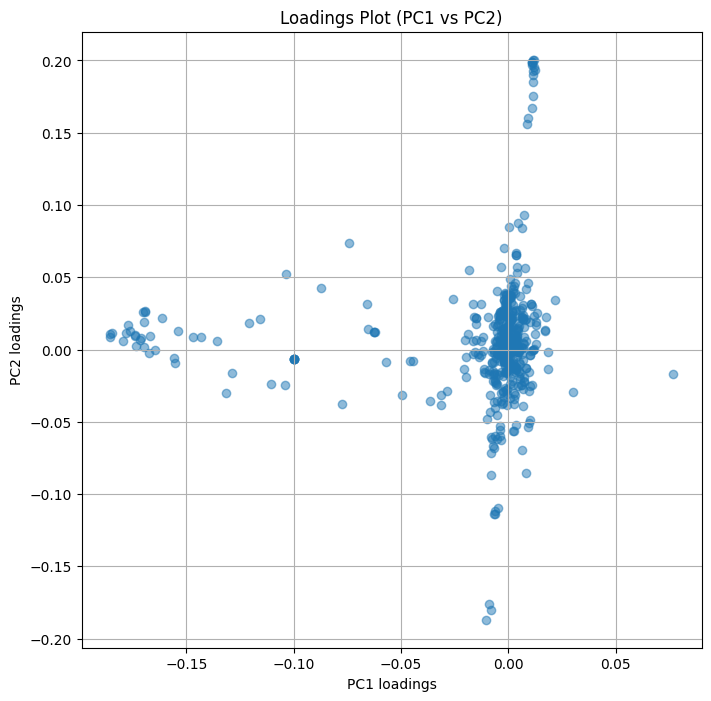

In [12]:
pc1_loadings = Vt[0, :]
pc2_loadings = Vt[1, :]

plt.figure(figsize=(8, 8))
plt.scatter(pc1_loadings, pc2_loadings, alpha=0.5)

plt.xlabel("PC1 loadings")
plt.ylabel("PC2 loadings")
plt.title("Loadings Plot (PC1 vs PC2)")
plt.grid(True)
plt.show()

##(Stability Test) مرحله ۲.۴-  تست پایداری

In [13]:
rng = np.random.default_rng(42)
noise_level = 0.05
noise = noise_level * rng.normal(size=X_scaled.shape)
X_noisy = X_scaled + noise

# SVD-based selection on noisy data
U_n, s_n, Vt_n = np.linalg.svd(X_noisy, full_matrices=False)

k = 20
scores_n = ((s_n[:k] ** 2)[:, None] * np.abs(Vt_n[:k, :])).sum(axis=0)

svd_indices_noisy = np.argsort(scores_n)[-20:][::-1]
svd_features_noisy = features[svd_indices_noisy]   # feature names (not indices)

# RFE-based selection on noisy data
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rfe_noisy = RFE(estimator=rf, n_features_to_select=20, step=0.1)

rfe_noisy.fit(X_noisy, y)

rfe_indices_noisy = np.where(rfe_noisy.support_)[0]
rfe_features_noisy = features[rfe_indices_noisy]


# Overlap with original selected sets (based on feature names)
svd_overlap = set(svd_feature_names).intersection(set(svd_features_noisy))
rfe_overlap = set(rfe_feature_names).intersection(set(rfe_features_noisy))

print(f"SVD overlap: {len(svd_overlap)} / 20")
print(f"RFE overlap: {len(rfe_overlap)} / 20")

SVD overlap: 19 / 20
RFE overlap: 10 / 20


# بخش پنجم: مقایسه نهایی

In [14]:
# Split indices once so that all methods are evaluated on the same samples
idx = np.arange(len(y))
idx_tr, idx_te = train_test_split(idx, test_size=0.3, random_state=42, stratify=y)

Xmi_tr,  Xmi_te  = X_mi[idx_tr],  X_mi[idx_te]
Xrfe_tr, Xrfe_te = X_rfe[idx_tr], X_rfe[idx_te]
Xsvd_tr, Xsvd_te = X_svd[idx_tr], X_svd[idx_te]

y_tr, y_te = y.iloc[idx_tr], y.iloc[idx_te]

def train_eval(Xtr, Xte, ytr, yte):
    model = LogisticRegression(max_iter=1000, class_weight="balanced", solver="lbfgs", random_state=42)
    model.fit(Xtr, ytr)
    y_pred = model.predict(Xte)
    acc = accuracy_score(yte, y_pred)
    f1  = f1_score(yte, y_pred, pos_label=1)
    return acc, f1

acc_mi,  f1_mi  = train_eval(Xmi_tr,  Xmi_te,  y_tr, y_te)
acc_rfe, f1_rfe = train_eval(Xrfe_tr, Xrfe_te, y_tr, y_te)
acc_svd, f1_svd = train_eval(Xsvd_tr, Xsvd_te, y_tr, y_te)


## مرحله ۱.۵-  جدول مقایسه  

In [15]:
results = pd.DataFrame({
    "Method": ["MI", "RFE", "SVD"],
    "Accuracy": [acc_mi, acc_rfe, acc_svd],
    "F1-Score": [f1_mi, f1_rfe, f1_svd],
    "Feature Selection Time (s)": [mi_time, rfe_time, svd_select_time]
})

results

,Method,Accuracy,F1-Score,Feature Selection Time (s)
0,MI,0.651805,0.171717,4.539981
1,RFE,0.785563,0.273381,32.630737
2,SVD,0.592357,0.135135,0.000508


## مرحله ۲.۵-  تحلیل همپوشانی  

Overlap features: ['267']
Overlap count: 1 / 20
Overlap percentage: 5.0%


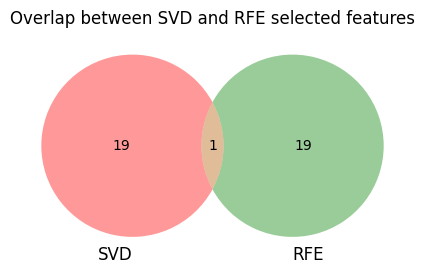

In [16]:
svd_set = set(svd_feature_names)
rfe_set = set(rfe_feature_names)

intersection = sorted(svd_set.intersection(rfe_set))

print("Overlap features:", intersection)
print(f"Overlap count: {len(intersection)} / 20")
print(f"Overlap percentage: {100*len(intersection)/20:.1f}%")

plt.figure(figsize=(5, 5))
venn2([svd_set, rfe_set], set_labels=("SVD", "RFE"))
plt.title("Overlap between SVD and RFE selected features")
plt.show()